In [2]:
import pandas as pd
import numpy as np
import missingno as msno

import warnings 
warnings.filterwarnings("ignore")



In [3]:
data = pd.read_csv("../data/raw/Aquifer_Petrignano.csv")
print(data.shape)
data.head()

(5223, 8)


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [5]:
from datetime import datetime, date

# keeping only the 10 years of data
data = data[data.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True) 
# notna() returns True is value is not null
# when a new dataframe is created after filtering the null values 
# it contains the column index with previous indexes
# reset_index(drop = True) helps in dropping that extra index column from dataframe
data = data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)
data.columns = ['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature', 'Volume', 'Hydrometry']
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y')

print(data.shape)
print(f"Nulls: {data.isnull().sum()}")
data.head()


(4199, 6)
Nulls: Date                     0
Rainfall                 0
Depth_to_groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64


,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [6]:
target = [data['Depth_to_groundwater']]
features = data.drop(['Depth_to_groundwater'], axis = 1)



Text(0.5, 0, 'Date')

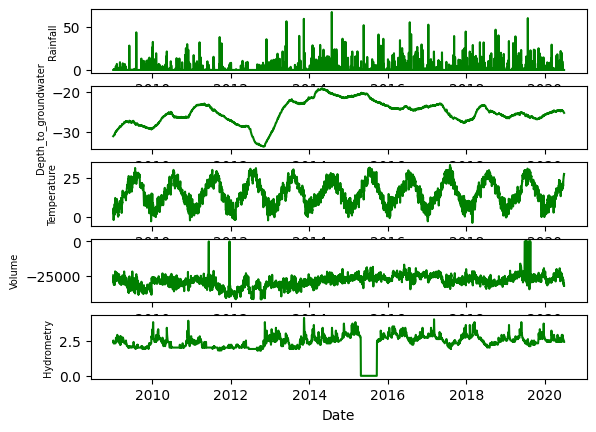

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows = 5, ncols = 1)

for i, col in enumerate(data.drop(['Date'], axis = 1).columns):
    sns.lineplot(x = data['Date'], y = data[col].fillna(method = 'ffill'), ax = ax[i], color = 'green')
    # fillna() function fills the NaN values using ffill method
    # ffill method replace NaN with last valid observation

    ax[i].set_ylabel(col, fontsize = 7)
    
ax[4].set_xlabel('Date')

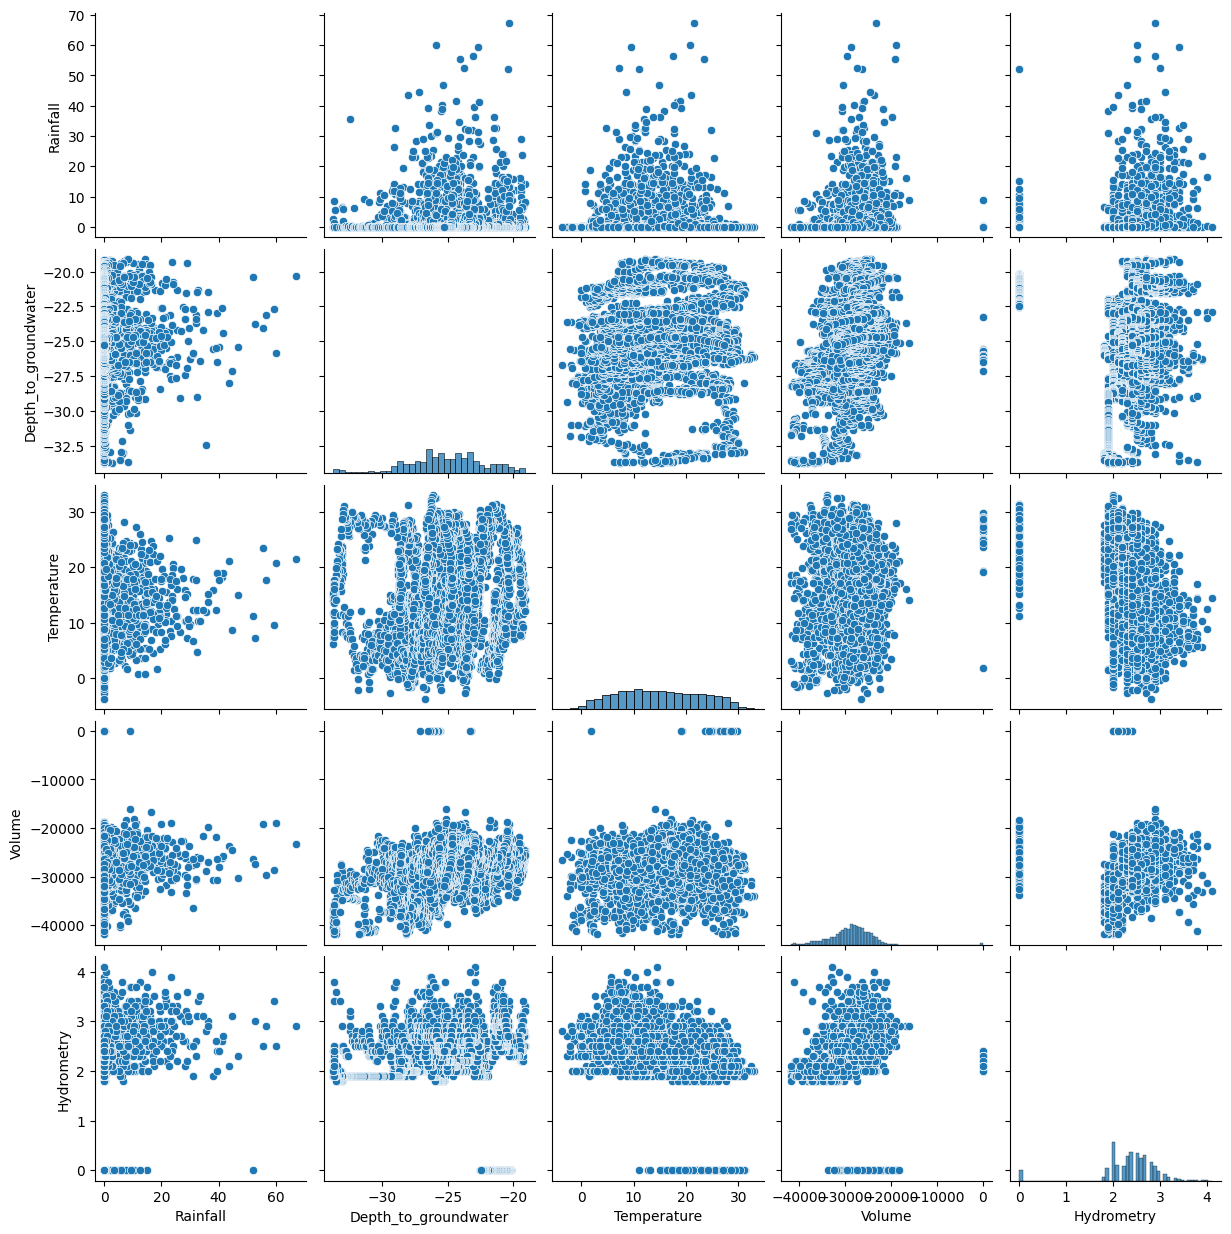

In [8]:
sns.pairplot(data)

In [9]:
# checkear que no falte ningún día y esté en orden cronológico

data = data.sort_values(by='Date')

data['Interval'] = data['Date'] - data['Date'].shift(1)
# shift() function shifts the index by one

print('Sum of all interval between dates: ', data['Interval'].sum())
print('Count number of rows: ', data['Interval'].count())

data = data.drop(['Interval'], axis=1)

print('Conclusion: It is clear that sum of intervals is equal to the number of rows which means dates are in chronological order.')

Sum of all interval between dates:  4198 days 00:00:00
Count number of rows:  4198
Conclusion: It is clear that sum of intervals is equal to the number of rows which means dates are in chronological order.


In [10]:
data.isnull().sum()

Date                     0
Rainfall                 0
Depth_to_groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64

In [11]:
data.head()

,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


<Axes: >

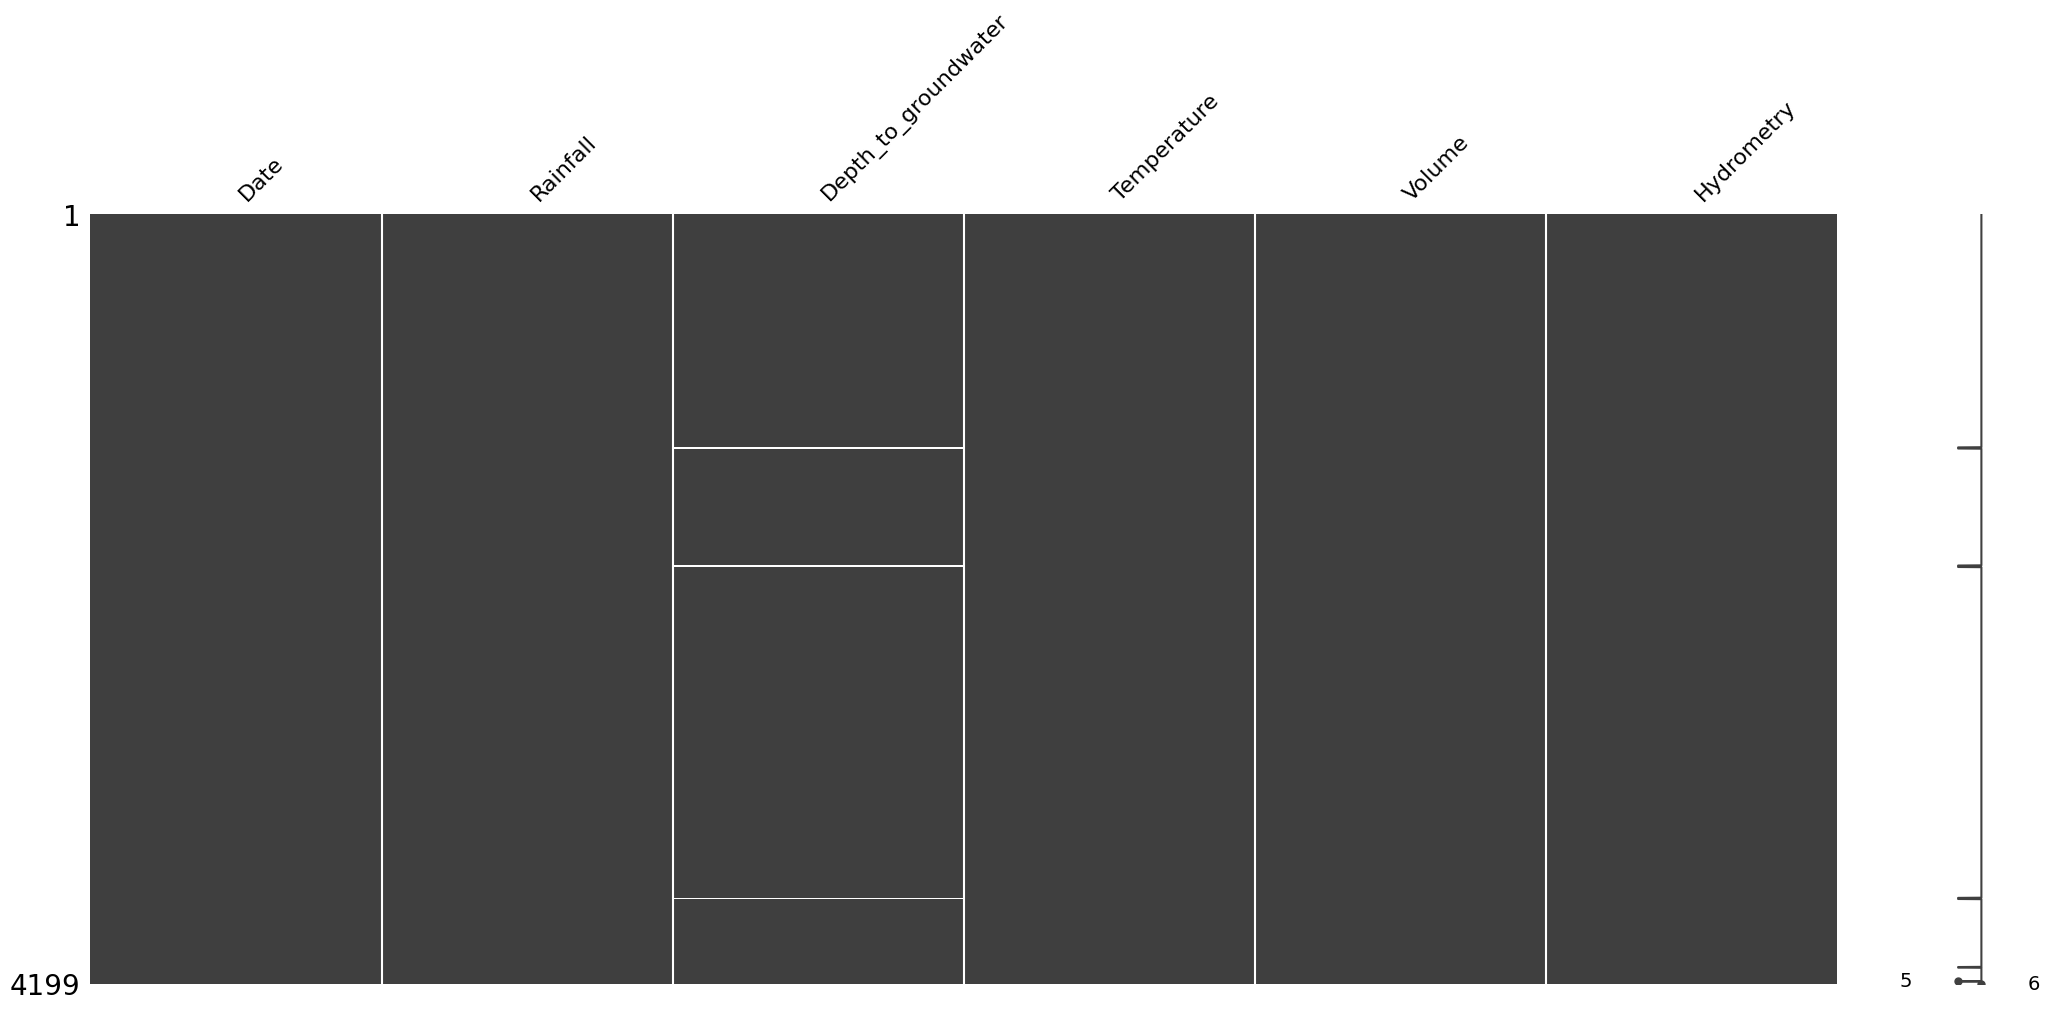

In [12]:
msno.matrix(data)

In [ ]:
fig, ax = plt.subpots(nrows = 4, ncols = 1, figsize = (15, 12))

sns.lineplot(x = data['Date'], y = data['Volume'].fillna(0), ax = ax[0], color = 'green', label = 'modified')
sns.lineplot(x = data['Date'], y = data['Volume'], hue=data['Volume'].isna().cumsum(), ax = ax[0], palette = ['blue']*sum(data['Volume'].isna()), label = 'original', legend = False)
# hue argument can be used to put the separate sections in separate buckets. 
# Though it is faster and easy to read but an outlier in the data which is 
# surrounded by None will not be drawn on the chart.
# palette color is set to blue for every section/bucket.



